In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from  yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
path = r'C:\Users\truon\OneDrive\Documents\TestLotte\Testing.xlsx'
df = pd.read_excel(path, "Data 1", header = 1, index_col=0 )

In [17]:
df

,DNI,BDG,PTT,VTU,NTG
% member invoice,1.853125e+01,3.190621e+01,2.787546e+01,2.870483e+01,3.056543e+01
Total invoice,1.039749e+06,1.113524e+06,1.230567e+06,1.716055e+06,1.675375e+06
Frequency member,2.800000e+00,2.400000e+00,2.600000e+00,2.300000e+00,2.300000e+00
Retail sale,1.997136e+11,2.734757e+11,2.696790e+11,4.111683e+11,6.538428e+11


In [18]:
df= df.transpose()
df

,% member invoice,Total invoice,Frequency member,Retail sale
DNI,18.531254,1039749.0,2.8,1.997136e+11
BDG,31.906212,1113524.0,2.4,2.734757e+11
PTT,27.875456,1230567.0,2.6,2.696790e+11
VTU,28.704826,1716055.0,2.3,4.111683e+11
NTG,30.565428,1675375.0,2.3,6.538428e+11


In [19]:
scaler = StandardScaler()
scaled_data_zscore = scaler.fit_transform(df)

In [20]:
df_zscore = pd.DataFrame(scaled_data_zscore, columns=df.columns, index = df.index)
df_zscore

,% member invoice,Total invoice,Frequency member,Retail sale
DNI,-1.908407,-1.106261,1.650274,-1.002727
BDG,0.932303,-0.847418,-0.412568,-0.545775
PTT,0.076210,-0.436768,0.618853,-0.569295
VTU,0.252360,1.266587,-0.928279,0.307222
NTG,0.647534,1.123860,-0.928279,1.810576


In [21]:
#correlation_matrix = df_zscore.corr()
#correlation_matrix


In [22]:
#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(2,6), timings = False)
#visualizer.fit(df_zscore)  
#visualizer.show() 

In [23]:
#visualizer = KElbowVisualizer(
#model, k=(2,5), metric='calinski_harabasz', timings=False, locate_elbow=True)
#visualizer.fit(df_zscore)
#visualizer.show()

In [24]:
model = KMeans(n_clusters = 2, init = "k-means++",
max_iter = 300, n_init = 10, random_state = 0) # Tạo mô hình K-Means với số cụm là 2
y_kmeans = model.fit(df_zscore) # Thực hiện phân cụm
labels = model.labels_ # Lấy nhãn của từng điểm dữ liệu
centroids = model.cluster_centers_ 
# Lấy các điểm trung tâm của cụm

c:\Users\truon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
print(y_kmeans)
print(" Our cluster centers are as follows")
print(centroids)

KMeans(n_clusters=2, n_init=10, random_state=0)
 Our cluster centers are as follows
[[ 0.44994692  1.19522338 -0.92827912  1.05889888]
 [-0.29996461 -0.79681559  0.61885275 -0.70593259]]


In [26]:
df_res = df_zscore.copy()
df_res['cluster']=model.fit_predict(df_zscore)
df_res

c:\Users\truon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,% member invoice,Total invoice,Frequency member,Retail sale,cluster
DNI,-1.908407,-1.106261,1.650274,-1.002727,1
BDG,0.932303,-0.847418,-0.412568,-0.545775,1
PTT,0.076210,-0.436768,0.618853,-0.569295,1
VTU,0.252360,1.266587,-0.928279,0.307222,0
NTG,0.647534,1.123860,-0.928279,1.810576,0


Silhouette Score: 0.382


c:\Users\truon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\truon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


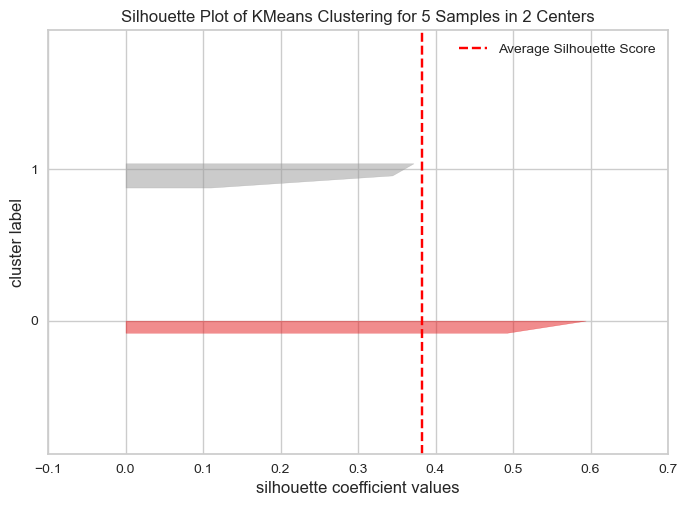

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
sil_score = silhouette_score(df_zscore, labels, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_zscore)   
visualizer.poof()